In [12]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
# Loading your IBM Q account(s)

###################
# ENTER IBM API KEY
# IBMQ.save_account("")
###################

provider = IBMQ.load_account()

##################
# SWAP BACKEND
# provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')
##################

provider = IBMQ.get_provider(hub='ibm-q-education', group='thenewschool-1', project='tns2022')

configrc.store_credentials:WARNING:2022-10-15 21:16:40,777: Credentials already present. Set overwrite=True to overwrite.
ibmqfactory.load_account:WARNING:2022-10-15 21:16:41,013: Credentials are already in use. The existing account in the session will be replaced.


In [13]:
qc = QuantumCircuit(4, 4)
qc.h(0)
qc.cx(0, 1)
qc.cx(1, 2)
qc.cx(2, 3)
qc.measure([0, 1, 2, 3], [0, 1, 2, 3])
qc.draw();

ibmq_jakarta supports memory to see invidual results.
['1100', '1110', '0000', '0000', '0000', '1111', '0000', '1111', '1111', '0000', '1111', '1111', '0000', '0000', '0000', '1111', '0001', '1111', '1111', '0111', '1111', '1111', '0000', '1111', '1000', '0000', '0000', '0000', '1111', '1110', '0000', '1111', '1111', '0000', '0000', '0000', '0000', '1111', '1111', '0000', '0000', '0001', '0000', '0111', '0110', '0111', '1111', '1111', '0000', '0000', '1111', '0000', '0000', '0001', '0000', '0000', '0000', '1111', '0000', '0000', '0000', '1111', '0000', '0000', '1111', '1111', '1111', '0000', '0000', '1111', '1110', '0000', '0000', '0001', '1111', '0011', '1111', '0000', '0100', '0000', '0000', '0111', '1111', '1101', '1011', '0010', '0000', '1111', '0000', '0000', '0111', '0000', '1111', '1111', '0000', '0000', '1111', '0000', '0000', '0000', '0000', '1111', '1111', '0000', '0000', '0000', '0000', '1111', '0000', '1111', '0001', '0001', '1001', '0000', '0000', '1101', '1111', '0000', '

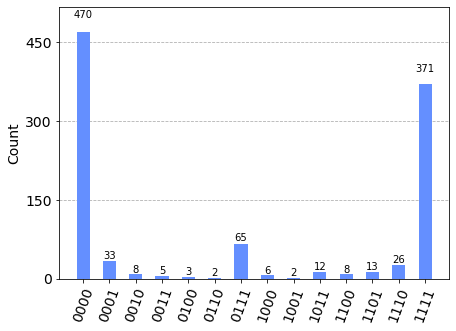

In [14]:

#use a real backend
#backend = provider.get_backend('ibmq_qasm_simulator')
backend = provider.get_backend('ibmq_jakarta')

#check if this backend supports memory
if backend.configuration().memory :
    print(backend.name() + " supports memory to see invidual results.")
else:
    print(backend.name() + " does not support individual results... defaulting to ourense")
    
    
shots = 1024
job = execute(qc, backend, shots=shots, memory=True)

#we want to see results independently, instead of as a probability
result = job.result()
memory = result.get_memory()

# need an array to drop all the results into
outputArray = []

#convert results to int and drop into array
for x in range(0, shots):
#     converted = int(memory[x], 2)
    outputArray.append(memory[x])
    
print(outputArray)

plot_histogram(job.result().get_counts())

In [15]:
import json
with open("sample.json", "w") as outfile:
    json.dump(outputArray, outfile)

In [37]:
list = outputArray


for i in range(len(list)):
    if list[i] == '0000':
        newValue = 1
    if list[i] == '0001':
        newValue = 2
    if list[i] == '0010':
        newValue = 3
    if list[i] == '0011':
        newValue = 4
    if list[i] == '0100':
        newValue = 5
    if list[i] == '0110':
        newValue = 6
    if list[i] == '0111':
        newValue = 7
    if list[i] == '1000':
        newValue = 8
    if list[i] == '1001':
        newValue = 9
    if list[i] == '1011':
        newValue = 10
    if list[i] == '1100':
        newValue = 11
    if list[i] == '1101':
        newValue = 12
    if list[i] == '1110':
        newValue = 13
    if list[i] == '1111':
        newValue = 14
        
        
    leftMax = 14
    leftMin = 1
    rightMax = 1
    rightMin = 0
    
    leftSpan = leftMax - leftMin
    rightSpan = rightMax - rightMin
    
    valueScaled = float(newValue-leftMin)/float(leftSpan)
    list[i] = valueScaled
    
print(list)    


[0.7692307692307693, 0.9230769230769231, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.07692307692307693, 1.0, 1.0, 0.46153846153846156, 1.0, 1.0, 0.0, 1.0, 0.5384615384615384, 0.0, 0.0, 0.0, 1.0, 0.9230769230769231, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.07692307692307693, 0.0, 0.46153846153846156, 0.38461538461538464, 0.46153846153846156, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.07692307692307693, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.9230769230769231, 0.0, 0.0, 0.07692307692307693, 1.0, 0.23076923076923078, 1.0, 0.0, 0.3076923076923077, 0.0, 0.0, 0.46153846153846156, 1.0, 0.8461538461538461, 0.6923076923076923, 0.15384615384615385, 0.0, 1.0, 0.0, 0.0, 0.46153846153846156, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.07692307692307693, 0.07692307692307693, 0.6153846153846154, 0.0, 0.0, 0.8461538461538461, 1.0, 0.0, 0.0, 0.0, 1.0, 0.46153846153846156,

In [38]:
with open("normalized.json", "w") as outfile:
    json.dump(outputArray, outfile)